In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score, recall_score, balanced_accuracy_score, roc_curve
# from sklearn.utils import shuffle
# from sklearn.datasets import make_classification
# from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# from imblearn.over_sampling import SMOTE

In [3]:
def score(X_test, y_test, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.6f}")
    print(f"Error Rate: {1-acc}")
    Recall = recall_score(y_test, y_pred, average='macro')      
    print(f"Mean Recall: {Recall}")
    print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, y_pred)}")
    Array_prec_recall_f = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f"Precision: {Array_prec_recall_f[0]}")
    print(f"F-Score: {Array_prec_recall_f[2]}")
          
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_test[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
           FP += 1
        if y_test[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1

    Selectivity = TN/(TN + FP)
    G_mean = np.sqrt(Selectivity*Recall) 
    print(f"Selectivity: {Selectivity}") 
    print(f"G_mean: {G_mean}")   
    
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
   
        

In [4]:

Train_path = "../datasets/ApsFailure/aps_failure_training_set_processed_8bit.csv"
Test_path = "../datasets/ApsFailure/aps_failure_test_set_processed_8bit.csv"
train_df = pd.read_csv(Train_path)
test_df = pd.read_csv(Test_path)

label_encoder = LabelEncoder()
train_df['class'] = label_encoder.fit_transform(train_df['class'])
test_df['class'] = label_encoder.fit_transform(test_df['class'])

X_train, y_train = train_df.values[:, 1:], train_df.values[:, 0]
X_test, y_test = test_df.values[:, 1:], test_df.values[:, 0]



In [5]:
train_df['class'].unique()

array([0, 1], dtype=int64)

In [6]:
train_df['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

In [7]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

Counter({0.0: 59000, 1.0: 1000})
Training set score: 0.99
Validation set score: 0.99
Accuracy: 0.986125
Error Rate: 0.01387499999999997
Mean Recall: 0.7209173333333333
Balanced Accuracy Score: 0.7209173333333333
Precision: 0.957082005777626
F-Score: 0.7961091284560708
Selectivity: 0.999168
G_mean: 0.8487152232121208


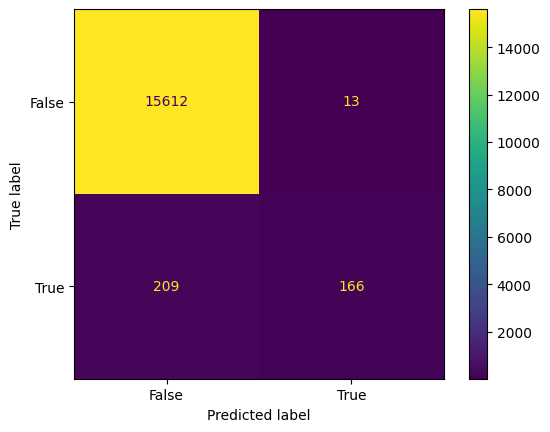

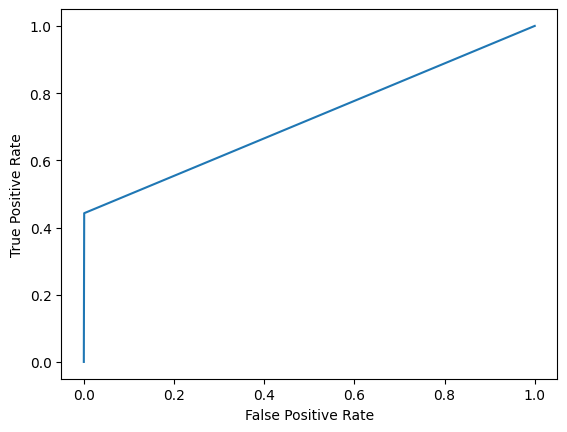

In [8]:
# KNN
x1_train, x1_val, y1_train, y1_val = train_test_split(X_train, y_train, random_state=0)
counter = Counter(y1_train)
print(counter)
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x1_train, y1_train)
pred = model.predict(x1_val)
pred
print("Training set score: {:.2f}".format(knn.score(x1_train, y1_train)))
print("Validation set score: {:.2f}".format(knn.score(x1_val, y1_val)))
score(X_test, y_test, model)

Counter({0.0: 44239, 1.0: 761})
Counter({0.0: 44239, 1.0: 44239})
Training set score: 0.99
Validation set score: 0.97
Accuracy: 0.966688
Error Rate: 0.03331249999999997
Mean Recall: 0.9347946666666667
Balanced Accuracy Score: 0.9347946666666667
Precision: 0.7014180558493993
F-Score: 0.7709147659751157
Selectivity: 0.968256
G_mean: 0.9513782343358502


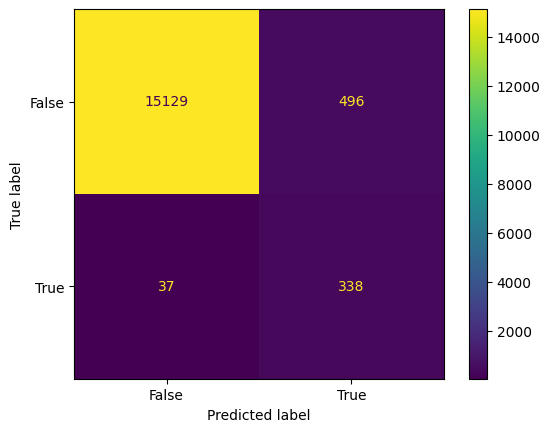

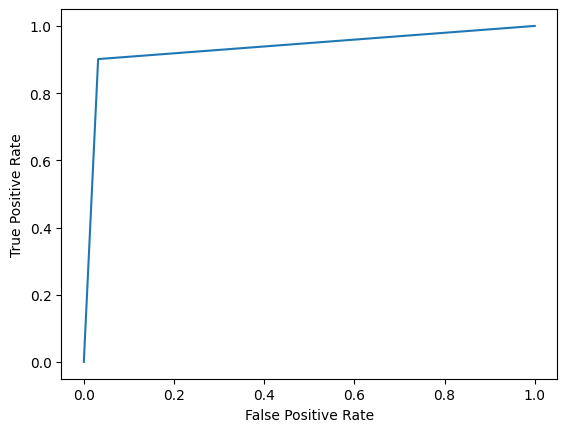

In [11]:
# Smote + KNN
x1_train, x1_val, y1_train, y1_val = train_test_split(X_train, y_train, random_state=0)
counter = Counter(y1_train)
print(counter)
oversample = SMOTE()
x2_train, y2_train = oversample.fit_resample(x1_train, y1_train)
counter = Counter(y2_train)
print(counter)
knn = KNeighborsClassifier(n_neighbors=5)
model=knn.fit(x2_train, y2_train)
pred = model.predict(x1_val)
pred
print("Training set score: {:.2f}".format(knn.score(x2_train, y2_train)))
print("Validation set score: {:.2f}".format(knn.score(x1_val, y1_val)))
score(X_test, y_test, model)